<a href="https://colab.research.google.com/github/SLMath/Credit_Score-Analysis/blob/main/credit_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar Dados

In [119]:
import pandas as pd
import numpy as np

In [120]:
data_df = pd.read_csv('https://github.com/SLMath/Credit_Score-Analysis/raw/main/data/train.csv')
print(data_df.shape)
data_df.head()

(100000, 28)


<ipython-input-120-f5e0b1df3013>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv('https://github.com/SLMath/Credit_Score-Analysis/raw/main/data/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [121]:
aval_df = pd.read_csv('https://github.com/SLMath/Credit_Score-Analysis/raw/main/data/test.csv')
print(aval_df.shape)
aval_df.head()

(50000, 27)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


# EDA

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [123]:
data_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

## Verificando dados irrelevantes para a análise

In [124]:
data_df['Customer_ID'].isna().sum()

0

In [125]:
len(data_df['Customer_ID'].unique())

12500

In [126]:
data_df['Customer_ID'].apply(lambda cust_prefix: not re.match('CUS_0x[1-9a-f][0-9a-f]*', cust_prefix)).sum()

0

O "ID" é único para cada registro, portando dispensável.

Como o "Customer_ID", "Name" e "SSN" são redundantes, manteremos apenas "Customer_ID" (verificado que não há nulos).

Vimos que existem 12500 Customers IDs diferentes, todos com prefixo 'CUS_0x' seguido de um hexadecimal

In [127]:
data_df = data_df.drop(columns= ['ID', 'Name', 'SSN'])

In [128]:
# Extraindo e transformando o hexadecimal em int, para melhorar o processamento e armazenamento dos dados
data_df['Customer_ID'] = data_df['Customer_ID'].str[4:].apply(int, base=16)
len(data_df['Customer_ID'].unique())

12500

Não houve perdas de customer ID

## Verificando tipos de dados inconsistentes

In [129]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int64  
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  object 
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  object 
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92998 non-null   object 
 13  Changed_Credit_Limit      100000 non-null  ob

Os seguintes atributos estão com tipos diferentes do esperado:
- numéricos, tratados como objetos
    - Age
    - Annual_Income
    - Num_of_Loan
    - Num_of_Delayed_Payment
    - Changed_Credit_Limit
    - Outstanding_Debt
    - Credit_History_Age
    - Amount_invested_monthly
    - Monthly_Balance
- inteiro, tratados como float
    - Num_Credit_Inquiries

### Num_Credit_Inquiries

In [130]:
# Verify not int values
pd.Series( value for value in data_df['Num_Credit_Inquiries'] if not value.is_integer() ).unique()

array([nan])

O np.nan impede que a coluna seja int

### Age

In [131]:
# Verify not numerical values
data_df['Age'][ pd.to_numeric(data_df['Age'], errors='coerce', ).isna() ].unique()

array(['28_', '34_', '30_', '24_', '33_', '35_', '31_', '40_', '37_',
       '54_', '21_', '20_', '43_', '38_', '18_', '2111_', '46_', '16_',
       '19_', '47_', '53_', '25_', '27_', '55_', '42_', '48_', '49_',
       '50_', '32_', '22_', '17_', '29_', '15_', '51_', '26_', '39_',
       '14_', '36_', '44_', '7670_', '45_', '23_', '41_', '52_', '733_',
       '5769_', '4383_', '56_', '2650_', '3307_', '6962_', '5589_',
       '6556_', '1447_', '8153_', '3834_', '6744_', '6471_', '7723_',
       '7640_', '6408_', '3502_', '7316_', '1102_', '8669_', '2463_',
       '6666_', '3055_', '1248_', '2220_', '2159_', '4583_', '3988_',
       '2155_', '6770_', '1843_', '1367_', '3742_', '2171_', '5109_',
       '3984_', '2474_', '5046_', '7715_', '2329_', '707_', '844_',
       '2756_', '2037_', '902_', '8523_', '3640_', '3998_', '3712_',
       '2097_', '8348_', '5373_', '3291_', '2994_', '3339_', '2812_',
       '3578_', '3564_', '1794_', '737_', '4301_', '2846_', '2373_',
       '1188_', '8207

In [132]:
# remove "_" at the end and convert to a number
data_df['Age'] = data_df['Age'].str.replace('_', '').astype(int)
data_df['Age']

0         23
1         23
2       -500
3         23
4         23
        ... 
99995     25
99996     25
99997     25
99998     25
99999     25
Name: Age, Length: 100000, dtype: int64

In [133]:
# Apply the same for other columns
remove_underline_cols = [
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Credit_History_Age',
    'Amount_invested_monthly',
    'Monthly_Balance'
]
for col in remove_underline_cols:
    data_df[col] = data_df[col].str.replace('_', '')
    try:
        data_df[col] = data_df[col].apply(float)
    except:
        pass

data_df[remove_underline_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Annual_Income            100000 non-null  float64
 1   Num_of_Loan              100000 non-null  float64
 2   Num_of_Delayed_Payment   92998 non-null   float64
 3   Changed_Credit_Limit     100000 non-null  object 
 4   Outstanding_Debt         100000 non-null  float64
 5   Credit_History_Age       90970 non-null   object 
 6   Amount_invested_monthly  95521 non-null   float64
 7   Monthly_Balance          97132 non-null   float64
dtypes: float64(6), object(2)
memory usage: 6.1+ MB


2 colunas ainda precisam de tratamento:
1. Changed_Credit_Limit
2. Credit_History_Age

### Changed_Credit_Limit

In [134]:
# Verify not numerical values
data_df['Changed_Credit_Limit'][ pd.to_numeric(data_df['Changed_Credit_Limit'], errors='coerce').isna() ].unique()

array([''], dtype=object)

In [135]:
# Tratar dados faltantes como nulos
data_df['Changed_Credit_Limit'] = pd.to_numeric(data_df['Changed_Credit_Limit'], errors='coerce')
data_df['Changed_Credit_Limit']

0        11.27
1        11.27
2          NaN
3         6.27
4        11.27
         ...  
99995    11.50
99996    11.50
99997    11.50
99998    11.50
99999    11.50
Name: Changed_Credit_Limit, Length: 100000, dtype: float64

### Credit_History_Age

In [136]:
# Verify not numerical values
data_df['Credit_History_Age'][ pd.to_numeric(data_df['Credit_History_Age'], errors='coerce', ).isna() ].unique()

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and

In [137]:
# Verificar o formato:
formato_age = '\d+ Years and \d+ Months'
np.any(
    data_df['Credit_History_Age']\
    .dropna()\
    .apply(lambda value: not re.match(formato_age, value))
)

False

In [138]:
# Transformar texto em numero de meses
def extract_number_months(years_months_str):
    y, m = np.array(years_months_str.split('-')).astype(int)
    return y * 12 + m

# Transform: '{y} Years and {m} Months' into '{y}-{m}', and then apply extract_number_months
data_df['Credit_History_Age'] = data_df['Credit_History_Age']\
    .dropna()\
    .str.replace(' Years and ', '-')\
    .str.replace(' Months', '')\
    .apply(extract_number_months)

data_df['Credit_History_Age']

0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

### Month: text to number

In [139]:
# assumindo que todos os dados são do mesmo ano, transformaremos a coluna de meses
# para numerica para permitir ordenação.
# OBS: não usaremos datatime pois ele requer uma data, e não temos ano
mapa_meses = {
    'January' : 1,
    'February' : 2,
    'March' : 3,
    'April' : 4,
    'May' : 5,
    'June' : 6,
    'July' : 7,
    'August' : 8
}

data_df['Month'] = data_df['Month'].map(mapa_meses)
data_df['Month']

0        1
1        2
2        3
3        4
4        5
        ..
99995    4
99996    5
99997    6
99998    7
99999    8
Name: Month, Length: 100000, dtype: int64

## Avaliar comportamento esperado de alguns dados

### Credit_History_Age must follow Month increment for each customer

In [140]:
# auxiliary dataframe to analyse columns difference over time
aux_data = data_df[['Customer_ID']]
aux_data['dif'] = data_df['Credit_History_Age'] - data_df['Month']
aux_data

<ipython-input-140-077589594813>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_data['dif'] = data_df['Credit_History_Age'] - data_df['Month']


,Customer_ID,dif
0,3392,264.0
1,3392,NaN
2,3392,264.0
3,3392,264.0
4,3392,264.0
...,...,...
99995,37932,374.0
99996,37932,374.0
99997,37932,374.0
99998,37932,374.0


In [141]:
# check how many 'dif' non null dif values each customer has
aux_data.dropna().groupby('Customer_ID')['dif'].apply(lambda difs: len(difs.unique())).sort_values()

Customer_ID
1006     1
34234    1
34235    1
34237    1
34238    1
        ..
17737    1
17740    1
17743    1
17648    1
50999    1
Name: dif, Length: 12500, dtype: int64

Todos tem um e apenas um, logo esses dados estão como esperado.
Podemos inclusive preencher todos os valores uma vez que a coluna Month está completa.

In [142]:
# Esse valor foi convertido para unidade meses, então deve incrementar um para cada mes que passa
fill_data = aux_data.groupby('Customer_ID')['dif'].transform(lambda difs: difs.dropna().iloc[0])
fill_data.dropna().groupby(data_df['Customer_ID']).apply(lambda difs: len(difs.unique())).sort_values()

Customer_ID
1006     1
34234    1
34235    1
34237    1
34238    1
        ..
17737    1
17740    1
17743    1
17648    1
50999    1
Name: dif, Length: 12500, dtype: int64

In [143]:
# Esse valor foi convertido para unidade meses, então deve incrementar um para cada mes que passa
data_df['Credit_History_Age'] = data_df['Credit_History_Age'].fillna(fill_data)
data_df[['Customer_ID', 'Month', 'Credit_History_Age']]

,Customer_ID,Month,Credit_History_Age
0,3392,1,265.0
1,3392,2,264.0
2,3392,3,267.0
3,3392,4,268.0
4,3392,5,269.0
...,...,...,...
99995,37932,4,378.0
99996,37932,5,379.0
99997,37932,6,380.0
99998,37932,7,381.0


### Age must vary at most by 1

In [144]:
# check max - min in ages
age_dif_df = data_df.groupby('Customer_ID')['Age'].apply(
    lambda age: age.max() - age.min()
)

# exibir valores inesperados
age_dif_df.sort_values()

Customer_ID
50999       0
37470       0
37475       0
17193       0
37480       0
         ... 
23548    8985
22372    9020
17951    9061
18817    9108
35428    9116
Name: Age, Length: 12500, dtype: int64

In [145]:
# max-min está muito discrepante, vamos transformar em nulos os valores
# impossiveis para idade e refazer a analise
data_df.loc[data_df[data_df['Age'] < 0].index, 'Age'] = np.nan
data_df.loc[data_df[data_df['Age'] > 120].index, 'Age'] = np.nan

# check max - min in ages
age_dif_df = data_df.groupby('Customer_ID')['Age'].agg(
    lambda age: age.max() - age.min()
)

# exibir valores inesperados
age_dif_df.sort_values()

Customer_ID
50999     0.0
39949     0.0
19945     0.0
19944     0.0
39956     0.0
         ... 
7635     71.0
20480    78.0
8620     88.0
22419    88.0
5703     99.0
Name: Age, Length: 12500, dtype: float64

In [146]:
aval_cust = age_dif_df[age_dif_df > 1].index
weird_ages = data_df[data_df['Customer_ID'].apply(lambda id : id in aval_cust)][['Customer_ID', 'Age']]
weird_ages.value_counts().sort_index().to_frame()

0
Customer_ID Age     
3528        51.0   7
            95.0   1
5703        19.0   7
            118.0  1
7635        24.0   7
            95.0   1
8620        27.0   7
            115.0  1
15258       32.0   7
            100.0  1
19300       35.0   7
            102.0  1
20480       33.0   7
            111.0  1
20939       48.0   6
            109.0  1
22419       24.0   4
            25.0   3
            112.0  1
32404       32.0   7
            95.0   1
49738       31.0   7
            99.0   1

In [147]:
# é pressumivel que há valores incongruentes acima de 90
# portanto vamos eliminar esses dados:
data_df.loc[weird_ages[ weird_ages['Age'] > 90 ].index, 'Age'] = np.nan

# check max - min in ages
age_dif_df = data_df.groupby('Customer_ID')['Age'].apply(
    lambda age: age.max() - age.min()
)

# exibir valores inesperados
age_dif_df.sort_values()

Customer_ID
50999    0.0
39949    0.0
39956    0.0
19969    0.0
19966    0.0
        ... 
21832    1.0
21865    1.0
21880    1.0
21812    1.0
25774    1.0
Name: Age, Length: 12500, dtype: float64

In [148]:
# Agora temos os valores como esperado, porém podemos preencher alguns valores:
# Dado um customer, substituiremos nulos se houver um mes antes e um depois com
# o mesmo valor para idade.
def fill_cust_month_gaps(month_data):
    col = month_data.columns[0]

    last_val = last_month = 0
    for idx, (val, month) in month_data.dropna().iterrows():
        if month > last_month + 1 and val == last_val:
            month_data.loc[
                (month_data.Month > last_month) & (month_data.Month < month),
                col
            ] = val
        last_val, last_month = val, month
    return month_data[[col]]

print('before')
display(data_df[data_df.Customer_ID == 22419][['Age', 'Month']])

print()
print('after')
fill_cust_month_gaps(data_df[data_df.Customer_ID == 22419][['Age', 'Month']])

before


,Age,Month
5920,24.0,1
5921,NaN,2
5922,24.0,3
5923,24.0,4
5924,24.0,5
5925,25.0,6
5926,25.0,7
5927,25.0,8



after


,Age
5920,24.0
5921,24.0
5922,24.0
5923,24.0
5924,24.0
5925,25.0
5926,25.0
5927,25.0


In [149]:
data_df['Age'] = data_df['Age'].fillna(
    data_df\
        .groupby('Customer_ID', group_keys=False)[['Age', 'Month']]\
        .apply(fill_cust_month_gaps)\
        ['Age']
)
data_df[data_df.Customer_ID == 22419][['Age', 'Month']]

,Age,Month
5920,24.0,1
5921,24.0,2
5922,24.0,3
5923,24.0,4
5924,24.0,5
5925,25.0,6
5926,25.0,7
5927,25.0,8


### Num_of_Loan and Num_Credit_Inquiries must only increment

In [150]:
# verificando quais customers seguem o esperado
def is_not_monotonic(values):
    for val_ant, val_suc in zip(values, values[1:]):
        if val_ant > val_suc:
            return True
    return False

data_df[
    data_df['Num_of_Loan'].groupby(data_df['Customer_ID']).transform(is_not_monotonic)
][['Customer_ID', 'Month', 'Num_of_Loan']]

,Customer_ID,Month,Num_of_Loan
16,11708,1,3.0
17,11708,2,3.0
18,11708,3,3.0
19,11708,4,3.0
20,11708,5,3.0
...,...,...,...
99987,34304,4,-100.0
99988,34304,5,5.0
99989,34304,6,5.0
99990,34304,7,5.0


In [151]:
# Existe um -100.0
# vamos substituir negativos por null
data_df.loc[data_df['Num_of_Loan'] < 0, 'Num_of_Loan'] = np.nan

# e reavaliar
data_df[
    data_df['Num_of_Loan'].groupby(data_df['Customer_ID']).transform(is_not_monotonic)
][['Customer_ID', 'Month', 'Num_of_Loan']]

,Customer_ID,Month,Num_of_Loan
16,11708,1,3.0
17,11708,2,3.0
18,11708,3,3.0
19,11708,4,3.0
20,11708,5,3.0
...,...,...,...
99851,12360,4,7.0
99852,12360,5,7.0
99853,12360,6,349.0
99854,12360,7,7.0


In [152]:
# Para o customer 12360, há um valor muito discrepante
# Com base nele, vamos trocar os valores isolados:
# Quando houve uma variação maior de 30 unidades por mes (1 por dia),
#   colocaremos nulos no lugar
def change_over30_inc(values):
    col = values.columns[0]

    # ordenar por mes, ignorando os nulos
    values_aux = values.dropna().sort_values('Month', ascending= True)
    # computar a diferença de tempo e de valor, linha a linha
    values_aux = values_aux - values_aux.shift(1)
    # eliminar primeira linha, pois o shift nela é nulo
    values_aux = values_aux.iloc[1:]
    # calculo da taxa de mudanca mensal do valor
    values_aux['change'] = values_aux[col] / values_aux['Month']
    # anular os valores para taxas acima de 30
    values.loc[values_aux[values_aux['change'] > 30].index, col] = np.nan

    return values[[col]]

data_df['Num_of_Loan'] = data_df.groupby(
    data_df['Customer_ID'], group_keys=False
    )[['Num_of_Loan', 'Month']].apply(
        change_over30_inc
        )

# e reavaliar
data_df[
    data_df['Num_of_Loan'].groupby(data_df['Customer_ID']).transform(is_not_monotonic)
][['Customer_ID', 'Month', 'Num_of_Loan']]

,Customer_ID,Month,Num_of_Loan
2008,16982,1,352.0
2009,16982,2,2.0
2010,16982,3,2.0
2011,16982,4,2.0
2012,16982,5,2.0
...,...,...,...
99763,6919,4,1.0
99764,6919,5,1.0
99765,6919,6,NaN
99766,6919,7,1.0


In [153]:
data_df[
    data_df['Num_of_Loan'].groupby(data_df['Customer_ID']).transform(is_not_monotonic)
][['Customer_ID', 'Num_of_Loan']].value_counts().to_frame().sort_index()

0
Customer_ID Num_of_Loan   
1424        2.0          6
            1406.0       1
1606        2.0          7
            1152.0       1
2738        1.0          7
...                     ..
48988       1189.0       1
49049       1.0          7
            1354.0       1
50523       8.0          4
            696.0        1

[142 rows x 1 columns]

In [154]:
pd.concat([
    data_df[data_df['Customer_ID'] == 1424],
    data_df[data_df['Customer_ID'] == 1606],
    data_df[data_df['Customer_ID'] == 50523]
])[['Customer_ID', 'Month', 'Num_of_Loan']]

,Customer_ID,Month,Num_of_Loan
15384,1424,1,1406.0
15385,1424,2,2.0
15386,1424,3,2.0
15387,1424,4,2.0
15388,1424,5,2.0
15389,1424,6,NaN
15390,1424,7,2.0
15391,1424,8,2.0
7600,1606,1,1152.0
7601,1606,2,2.0


In [155]:
# Para esses customers, há um valor muito discrepante no inicio
# Com base nele, vamos trocar os valores isolados:
# Quando houve uma variação maior de 30 unidades por mes (1 por dia),
#   colocaremos nulos no lugar
def change_over30_dec(values):
    col = values.columns[0]

    # ordenar por mes, ignorando os nulos
    values_aux = values.dropna().sort_values('Month', ascending= True)
    # computar a diferença de tempo e de valor, linha a linha
    values_aux = values_aux - values_aux.shift(-1)
    # eliminar ultima linha, pois o shift nela é nulo
    values_aux = values_aux.iloc[:-1]
    # calculo da taxa de mudanca mensal do valor (a diferença no mes ficou negativa)
    values_aux['change'] = - values_aux[col] / values_aux['Month']
    # anular os valores para taxas acima de 30
    values.loc[values_aux[values_aux['change'] > 30].index, col] = np.nan

    return values[[col]]

# change_over30_dec(data_df[data_df['Customer_ID'] == 50523][['Num_of_Loan', 'Month']])

data_df['Num_of_Loan'] = data_df.groupby(
    data_df['Customer_ID'], group_keys=False
    )[['Num_of_Loan', 'Month']].apply(
        change_over30_dec
        )

# e reavaliar
data_df[
    data_df['Num_of_Loan'].groupby(data_df['Customer_ID']).transform(is_not_monotonic)
][['Customer_ID', 'Month', 'Num_of_Loan']]

,Customer_ID,Month,Num_of_Loan
27728,24693,1,3.0
27729,24693,2,3.0
27730,24693,3,23.0
27731,24693,4,3.0
27732,24693,5,3.0
27733,24693,6,3.0
27734,24693,7,3.0
27735,24693,8,3.0
34776,15180,1,6.0
34777,15180,2,6.0


In [156]:
weird_cust = data_df[
    data_df['Num_of_Loan'].groupby(data_df['Customer_ID']).transform(is_not_monotonic)
][['Customer_ID', 'Month', 'Num_of_Loan']]

weird_cust.pivot(
    index= 'Month',
    columns= 'Customer_ID',
    values= 'Num_of_Loan'
)

Customer_ID,5559,15180,24693,25080,27175,46210
Month,,,,,,
1,3.0,6.0,3.0,NaN,2.0,19.0
2,3.0,6.0,3.0,9.0,2.0,1.0
3,3.0,6.0,23.0,9.0,2.0,1.0
4,3.0,6.0,3.0,9.0,2.0,1.0
5,NaN,31.0,3.0,23.0,2.0,1.0
6,3.0,6.0,3.0,9.0,2.0,1.0
7,17.0,6.0,3.0,9.0,29.0,1.0
8,3.0,6.0,3.0,9.0,2.0,1.0


In [157]:
# Os demais valores acima de 15 parecem tambem erros
# Vamos eliminá-los
def remove_high_values(values):
    if is_not_monotonic(values):
        values.loc[values > 15] = np.nan
    return values

data_df['Num_of_Loan'] = data_df['Num_of_Loan'].groupby(
    data_df['Customer_ID'], group_keys=False
    ).transform(remove_high_values)
data_df[data_df['Customer_ID'] == 5559][['Customer_ID', 'Month', 'Num_of_Loan']]

,Customer_ID,Month,Num_of_Loan
72888,5559,1,3.0
72889,5559,2,3.0
72890,5559,3,3.0
72891,5559,4,3.0
72892,5559,5,NaN
72893,5559,6,3.0
72894,5559,7,NaN
72895,5559,8,3.0


In [158]:
# tambem podemos aplicar aqui o tratamento dado a Age,
# substituindo os nulos entre dois valores iguais
data_df['Num_of_Loan'].isna().sum()

4342

In [159]:
data_df['Num_of_Loan'] = data_df['Num_of_Loan'].fillna(
    data_df\
        .groupby('Customer_ID', group_keys=False)[['Num_of_Loan', 'Month']]\
        .apply(fill_cust_month_gaps)\
        ['Num_of_Loan']
)
data_df['Num_of_Loan'].isna().sum()

1116

In [160]:
# Repetindo tudo para Num_Credit_Inquiries...
# vamos substituir negativos por null
data_df.loc[data_df['Num_Credit_Inquiries'] < 0, 'Num_Credit_Inquiries'] = np.nan

# Eliminar valores extrapolantes
data_df['Num_Credit_Inquiries'] = data_df.groupby(
    data_df['Customer_ID'], group_keys=False
    )[['Num_Credit_Inquiries', 'Month']].apply(
        change_over30_inc
        )

data_df['Num_Credit_Inquiries'] = data_df.groupby(
    data_df['Customer_ID'], group_keys=False
    )[['Num_Credit_Inquiries', 'Month']].apply(
        change_over30_dec
        )

# e avaliar
weird_cust = data_df[
    data_df['Num_Credit_Inquiries'].groupby(data_df['Customer_ID']).transform(is_not_monotonic)
][['Customer_ID', 'Month', 'Num_Credit_Inquiries']]

weird_cust.pivot(
    index= 'Month',
    columns= 'Customer_ID',
    values= 'Num_Credit_Inquiries'
)

Customer_ID,8635,12836,14190,19486,19695,23744,30587,35397
Month,,,,,,,,
1,4.0,4.0,3.0,6.0,1.0,12.0,6.0,10.0
2,4.0,4.0,31.0,6.0,1.0,29.0,9.0,15.0
3,4.0,4.0,3.0,6.0,1.0,12.0,32.0,31.0
4,4.0,NaN,3.0,6.0,31.0,12.0,9.0,15.0
5,4.0,34.0,3.0,6.0,2.0,12.0,9.0,15.0
6,32.0,4.0,6.0,33.0,2.0,12.0,9.0,15.0
7,4.0,4.0,6.0,6.0,NaN,12.0,9.0,15.0
8,4.0,4.0,6.0,6.0,2.0,12.0,9.0,15.0


In [161]:
# Os demais valores acima de 15 parecem tambem erros
# Vamos eliminá-los
data_df['Num_Credit_Inquiries'] = data_df['Num_Credit_Inquiries'].groupby(
    data_df['Customer_ID'], group_keys=False
    ).transform(remove_high_values)

data_df[data_df['Customer_ID'] == 35397][['Customer_ID', 'Month', 'Num_Credit_Inquiries']]

,Customer_ID,Month,Num_Credit_Inquiries
75280,35397,1,10.0
75281,35397,2,15.0
75282,35397,3,NaN
75283,35397,4,15.0
75284,35397,5,15.0
75285,35397,6,15.0
75286,35397,7,15.0
75287,35397,8,15.0


In [162]:
# tambem podemos aplicar aqui o tratamento dado a Age,
# substituindo os nulos entre dois valores iguais
data_df['Num_Credit_Inquiries'].isna().sum()

3610

In [163]:
data_df['Num_Credit_Inquiries'] = data_df['Num_Credit_Inquiries'].fillna(
    data_df\
        .groupby('Customer_ID', group_keys=False)[['Num_Credit_Inquiries', 'Month']]\
        .apply(fill_cust_month_gaps)\
        ['Num_Credit_Inquiries']
)
data_df['Num_Credit_Inquiries'].isna().sum()

1287

### Type_of_Loan must always append as well

In [164]:
# Primeiro vamos entender quais os diferentes tipos de emprestimos presentes
tipos_emprestimo = np.unique([
    texto
    for lista_texto in pd.Series(data_df['Type_of_Loan'].dropna().unique())\
        .str.replace(', and', ',')\
        .str.split(', ')
    for texto in lista_texto
])
tipos_emprestimo

array(['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan',
       'Home Equity Loan', 'Mortgage Loan', 'Not Specified',
       'Payday Loan', 'Personal Loan', 'Student Loan'], dtype='<U23')

In [165]:
# Vamos criar uma coluna para cada, e o valor 1 indicará
# que aquele tipo de ocorreu
def extract_loan_types(loan_arr):
    return pd.Series([
        tipo in loan_arr for tipo in tipos_emprestimo
    ], index= tipos_emprestimo)

data_df[tipos_emprestimo] = data_df['Type_of_Loan'].dropna().apply(extract_loan_types).astype(int)

data_df[tipos_emprestimo]

,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [166]:
# Para cada coluna de tipos_emprestimo, podemos verificar
# se elas sao crescentes
np.any(
    data_df[tipos_emprestimo].groupby(data_df['Customer_ID']).transform(is_not_monotonic)
)

False

Os dados estão bons

## Explorando e Visualizando dados

In [167]:
data_df.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan'],
      dtype='object')

In [219]:
statistics = data_df.drop(columns= ['Customer_ID', 'Month']).describe(include= 'all').T
statistics

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,98950.0,NaN,NaN,NaN,33.316928,10.768911,14.0,24.0,33.0,42.0,56.0
Occupation,100000,15,Lawyer,7096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,99001.0,NaN,NaN,NaN,50497.576053,38296.622971,7005.93,19344.27,36993.94,71676.0,179987.28
Monthly_Inhand_Salary,84998.0,NaN,NaN,NaN,4194.17085,3183.686167,303.645417,1625.568229,3093.745,5957.448333,15204.633333
Num_Bank_Accounts,99979.0,NaN,NaN,NaN,17.09508,117.416871,0.0,3.0,6.0,7.0,1798.0
Num_Credit_Card,100000.0,NaN,NaN,NaN,22.47443,129.05741,0.0,4.0,5.0,7.0,1499.0
Interest_Rate,100000.0,NaN,NaN,NaN,72.46604,466.422621,1.0,8.0,13.0,20.0,5797.0
Num_of_Loan,98884.0,NaN,NaN,NaN,3.536932,2.817469,0.0,2.0,3.0,5.0,439.0
Type_of_Loan,88592,6260,Not Specified,1408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delay_from_due_date,100000.0,NaN,NaN,NaN,21.06878,14.860104,-5.0,10.0,18.0,28.0,67.0


### Age - Distribuition

<Axes: xlabel='Age', ylabel='Count'>

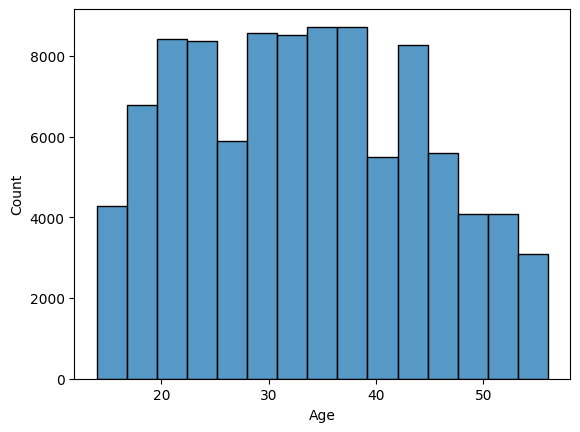

In [169]:
# Agora sim podemos ver a distribuição das idades
sns.histplot(data= data_df, x= 'Age', bins= 15)

Apresenta uma distribuição quase uniforme, com as bordas arredondadas

### Occupation - Valor inesperado "_______"

In [170]:
# A moda é "_______", inesperado
data_df.Occupation.unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [171]:
# Vamos trocar "_______" por np.nan e ver quantos cargos cada
# customer possui
data_df['Occupation'] = data_df['Occupation'].replace('_______', np.nan)
data_df.dropna(subset= 'Occupation').groupby('Customer_ID')['Occupation'].agg(
    lambda occupations: len(occupations.unique())
).sort_values()

Customer_ID
1006     1
34234    1
34235    1
34237    1
34238    1
        ..
17737    1
17740    1
17743    1
17648    1
50999    1
Name: Occupation, Length: 12500, dtype: int64

In [172]:
# Como todos possuem o mesmo cargo, vamos dar uma olhada em exemplos de casos nulos
data_df[data_df.Occupation.isna()].head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
8,8625,1,28.0,NaN,34847.84,3037.986667,2,4,6,1.0,...,Standard,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,11708,1,34.0,NaN,143162.64,12187.220000,1,5,8,3.0,...,Good,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18,11708,3,34.0,NaN,143162.64,NaN,1,5,8,3.0,...,Good,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20,11708,5,34.0,NaN,143162.64,12187.220000,1,5,8,3.0,...,Good,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29,47249,6,55.0,NaN,30689.89,2612.490833,2,5,4,1.0,...,Standard,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [226]:
def exib_customers(*ids, **cols_kw):
    df = pd.concat([
        data_df[data_df.Customer_ID == id] for id in ids
    ])
    if 'cols' in cols_kw:
        df = df[cols_kw['cols']]
    display(df)

exib_customers(8625, 11708, 47249)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
8,8625,1,28.0,Teacher,34847.84,3037.986667,2.0,4,6,1.0,...,Standard,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,8625,2,28.0,Teacher,34847.84,3037.986667,2.0,4,6,1.0,...,Good,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,8625,3,28.0,Teacher,34847.84,3037.986667,2.0,1385,6,1.0,...,Standard,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,8625,4,28.0,Teacher,34847.84,NaN,2.0,4,6,1.0,...,Good,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,8625,5,28.0,Teacher,34847.84,3037.986667,2.0,4,6,1.0,...,Good,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,8625,6,28.0,Teacher,34847.84,3037.986667,2.0,4,6,1.0,...,Good,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,8625,7,28.0,Teacher,34847.84,NaN,2.0,4,6,1.0,...,Good,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,8625,8,28.0,Teacher,34847.84,3037.986667,2.0,4,6,1.0,...,Good,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,11708,1,34.0,Engineer,143162.64,12187.220000,1.0,5,8,3.0,...,Good,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17,11708,2,34.0,Engineer,143162.64,12187.220000,1.0,5,8,3.0,...,Good,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [174]:
# Parecem apenas erros no arquivo
# Vamos ver casos mais extremos, com mais valores nulos
data_df.groupby('Customer_ID')['Occupation'].agg(
    lambda occupations: occupations.isna().sum()
).sort_values()

Customer_ID
50999    0
40507    0
22168    0
40508    0
22148    0
        ..
46569    4
49825    4
12867    4
39271    4
40551    5
Name: Occupation, Length: 12500, dtype: int64

In [175]:
pd.concat([
    data_df[data_df.Customer_ID == 12867],
    data_df[data_df.Customer_ID == 39271],
    data_df[data_df.Customer_ID == 40551]
])

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
52192,12867,1,21.0,NaN,40377.89,3206.824167,5,7,2,4.0,...,Poor,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
52193,12867,2,21.0,Doctor,40377.89,3206.824167,5,7,2,4.0,...,Poor,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
52194,12867,3,21.0,NaN,40377.89,3206.824167,5,7,2,4.0,...,Poor,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
52195,12867,4,21.0,Doctor,40377.89,3206.824167,5,7,2,4.0,...,Poor,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
52196,12867,5,21.0,NaN,40377.89,3206.824167,5,7,2,4.0,...,Standard,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
52197,12867,6,21.0,Doctor,40377.89,3206.824167,5,7,2,4.0,...,Poor,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
52198,12867,7,21.0,NaN,40377.89,3206.824167,166,7,2,4.0,...,Poor,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
52199,12867,8,21.0,Doctor,40377.89,3206.824167,5,7,2,4.0,...,Poor,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
87040,39271,1,NaN,Musician,52410.50,NaN,7,5,2,0.0,...,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87041,39271,2,50.0,NaN,52410.50,4650.541667,7,5,2,0.0,...,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
# Annual_Income	não possui valores nulos, porem talvez possua zeros
np.any(data_df.Annual_Income <= 0)

False

In [177]:
# Como todas as linhas possuem um annual_income, vamos
# preencher os valores faltantes de occupation com o
# esperado
data_df['Occupation'] = data_df['Occupation'].fillna(
    data_df.groupby('Customer_ID')['Occupation']\
        .transform(lambda occup: occup.dropna().iloc[0])
)

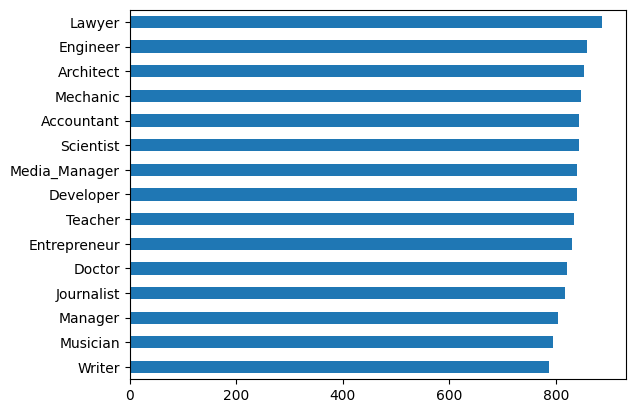

In [178]:
# Como possuem, so nos resta analisar um grafico de barras de contagem
_= (data_df['Occupation'].value_counts() / 8).sort_values(ascending= True).plot.barh()

Os cargos apresentam uma distribuição quase uniforme.

### Annual_Income - Outliers a direita?

<Axes: >

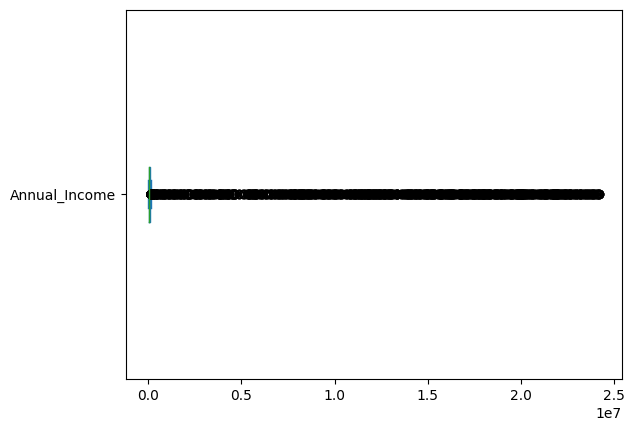

In [179]:
# possui um valor máximo muito elevado, vamos investigar outliers
data_df['Annual_Income'].plot.box(vert= False)

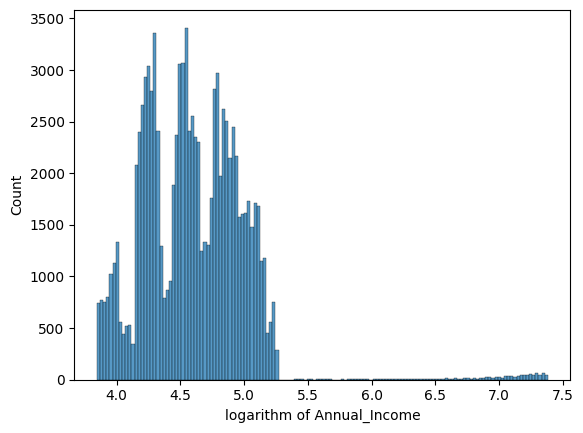

In [180]:
# Vamos olhar pelo log
sns.histplot(np.log10(data_df['Annual_Income']))
_ = plt.xlabel('logarithm of Annual_Income')

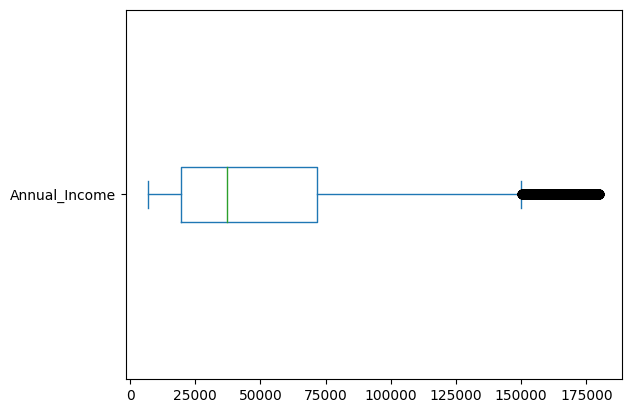

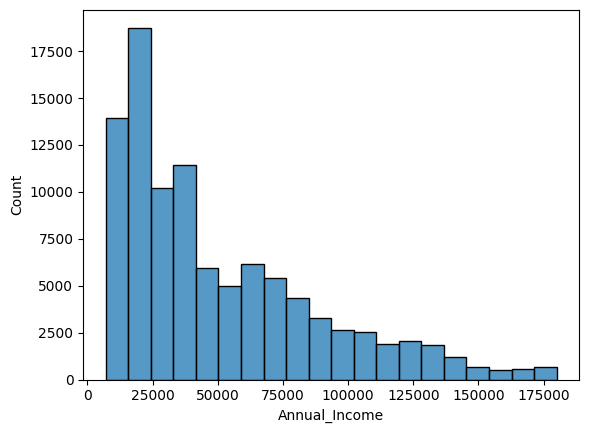

In [181]:
# Existem valores realmente muito elevados (acima de 1E7 => 10Mi),
# apesar da maior concentração ser na faixa baixo de 1E5.25 => 200k
data_df[data_df['Annual_Income'] < 2E5]['Annual_Income'].plot.box(vert= False)
plt.show()

_= sns.histplot(data_df[data_df['Annual_Income'] < 2E5]['Annual_Income'], bins= 20)

In [182]:
# A distribuição se assemelha a uma curva e^-x ou 1/x
# para a maior concentração dos dados

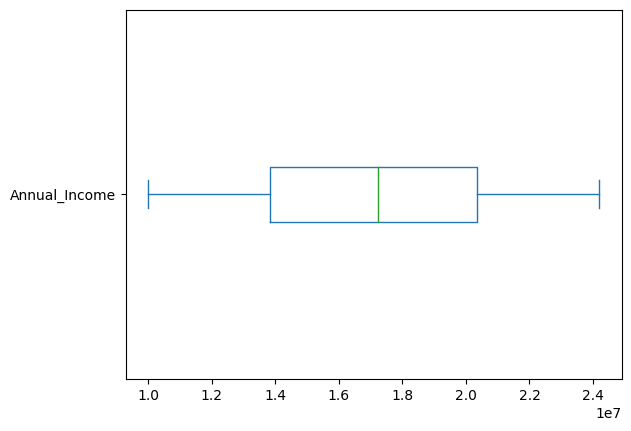

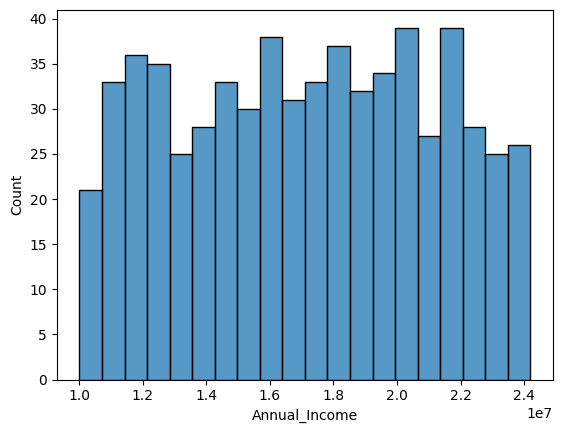

In [183]:
# Para a faixa mais extrema
data_df[data_df['Annual_Income'] > 1E7]['Annual_Income'].plot.box(vert= False)
plt.show()

_= sns.histplot(data_df[data_df['Annual_Income'] > 1E7]['Annual_Income'], bins= 20)

In [184]:
# Para esses casos, a distribuição se aproxima da uniforme
# Vamos analisar alguns casos
data_df[data_df['Annual_Income'] > 1E7]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
54,10314,7,34.0,Lawyer,10909427.0,NaN,0,1,8,2.0,...,Good,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
361,36507,2,15.0,Entrepreneur,18334118.0,4369.482500,10,10,18,8.0,...,Standard,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
368,24733,1,27.0,Architect,19717385.0,1057.435833,7,10,33,9.0,...,Standard,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
564,10279,5,18.0,Scientist,19257912.0,11809.560000,0,3,7,2.0,...,Good,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
602,13995,3,15.0,Teacher,22335783.0,3580.457500,10,7,30,6.0,...,Standard,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99264,42604,1,23.0,Accountant,17997617.0,6133.765000,0,3,2,NaN,...,Good,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
99280,21230,1,21.0,Manager,18721299.0,NaN,4,7,10,2.0,...,Standard,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99714,44477,3,26.0,Doctor,11712577.0,NaN,5,6,8,4.0,...,Standard,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
99882,18426,3,31.0,Mechanic,16884797.0,5440.945000,7,3,1947,0.0,...,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
# Parece haver dados discrepantes, pois nenhum dos customers exibidos se repete
exib_customers(10314, 42604, 20915)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
48,10314,1,33.0,Lawyer,131313.40,11242.783333,0,1,8,2.0,...,Good,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
49,10314,2,34.0,Lawyer,131313.40,11242.783333,0,1,8,2.0,...,Good,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50,10314,3,34.0,Lawyer,131313.40,10469.207759,0,1,8,2.0,...,Good,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
51,10314,4,34.0,Lawyer,131313.40,10469.207759,0,1,8,2.0,...,Good,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
52,10314,5,34.0,Lawyer,131313.40,10469.207759,0,1,8,2.0,...,Good,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53,10314,6,34.0,Lawyer,131313.40,NaN,0,1,8,2.0,...,Standard,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
54,10314,7,34.0,Lawyer,10909427.00,NaN,0,1,8,2.0,...,Good,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
55,10314,8,34.0,Lawyer,131313.40,10469.207759,0,1,8,2.0,...,Good,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
99264,42604,1,23.0,Accountant,17997617.00,6133.765000,0,3,2,NaN,...,Good,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
99265,42604,2,23.0,Accountant,74349.18,6133.765000,0,3,2,2.0,...,Good,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [186]:
# Os valores estão muito destoantes para um mesmo customer, o que será considerado
# um erro. Vamos anular os valores isolados, quando houve uma variação maior do dobro
def change_over2x(values):
    col = values.columns[0]

    # compararemos os valores com relacao a mediana, que deve representar
    # o valor esperado, e é mais robusta que a media na presença de outliers
    mediana = values[col].median()
    # anular os valores para taxas acima de 2
    values.loc[values[col] / mediana > 2, col] = np.nan

    return values[[col]]

# change_over10x(data_df[data_df.Customer_ID == 42604][['Annual_Income', 'Month']])

data_df['Annual_Income'] = data_df\
    .groupby(
        data_df['Customer_ID'], group_keys=False
    )[['Annual_Income', 'Month']]\
    .apply(
        change_over2x
    )

# e reavaliar
data_df[data_df['Annual_Income'] > 2E5][['Customer_ID', 'Month', 'Annual_Income']]

,Customer_ID,Month,Annual_Income


<Axes: >

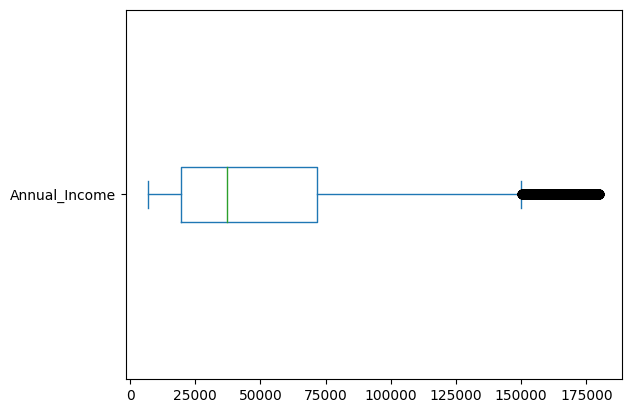

In [187]:
# Vamos reavaliar o boxplot completo
data_df['Annual_Income'].plot.box(vert= False)

In [188]:
# Vamos verificar os valores acima de 150k agora
data_df[data_df['Annual_Income'] > 150000][['Customer_ID', 'Month', 'Annual_Income']]

,Customer_ID,Month,Annual_Income
1728,11313,1,173196.32
1729,11313,2,173196.32
1730,11313,3,173196.32
1731,11313,4,173196.32
1732,11313,5,173196.32
...,...,...,...
99515,4345,4,150131.68
99516,4345,5,150131.68
99517,4345,6,150131.68
99518,4345,7,150131.68


In [189]:
# Parecem veridicos
# Vamos avaliar customers que apresentam mais de um valor para Annual_Income
# dentro de 8 meses
data_df.groupby('Customer_ID')['Annual_Income'].apply(lambda x : x.max() - x.min()).sort_values()

Customer_ID
1006     0.0
34234    0.0
34235    0.0
34237    0.0
34238    0.0
        ... 
17737    0.0
17740    0.0
17743    0.0
17648    0.0
50999    0.0
Name: Annual_Income, Length: 12500, dtype: float64

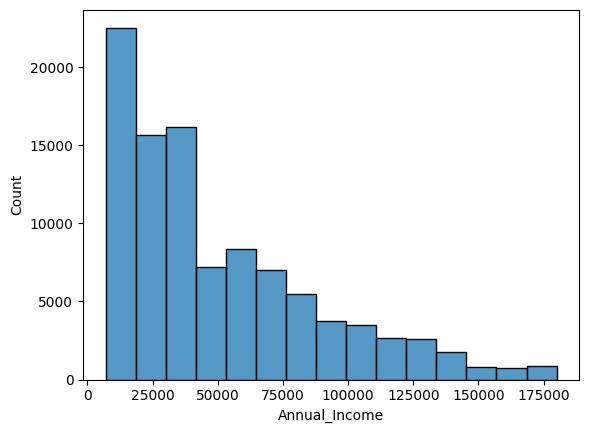

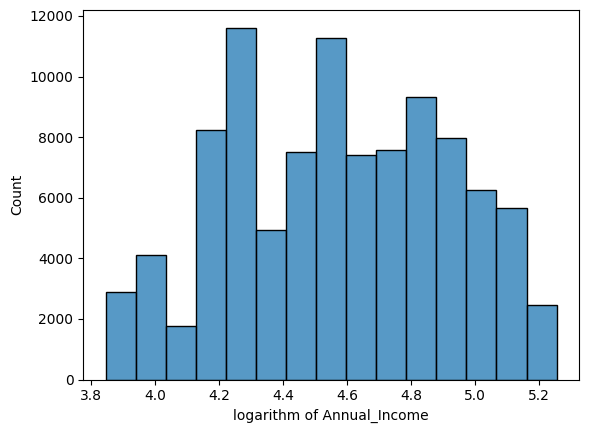

In [190]:
# Não há variação no Annual_Income
# Vamos olhar o histograma e o histograma do log
sns.histplot(data_df['Annual_Income'], bins=15)
plt.show()

sns.histplot(np.log10(data_df['Annual_Income']), bins=15)
_ = plt.xlabel('logarithm of Annual_Income')

In [191]:
# Agora, a distribuição de todos os dados se assemelha a uma curva
# - e^-x ou
# 1/x

### Monthly_Inhand_Salary distribution

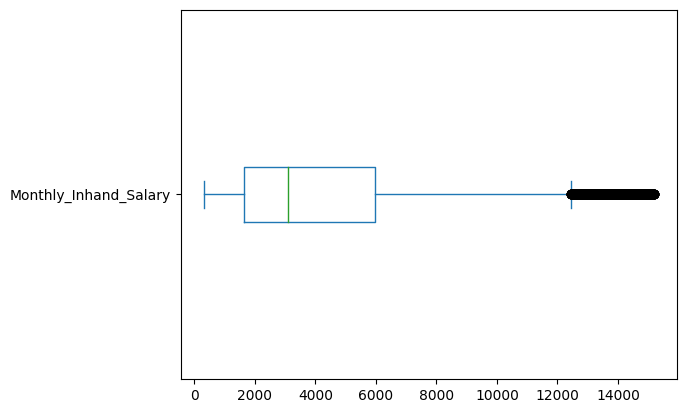

<Axes: ylabel='Frequency'>

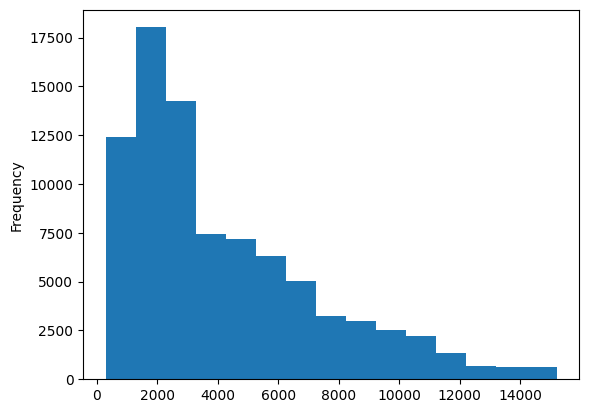

In [192]:
# possui um valor máximo muito elevado, vamos investigar outliers
data_df['Monthly_Inhand_Salary'].plot.box(vert= False)
plt.show()

data_df['Monthly_Inhand_Salary'].plot.hist(bins= 15)

In [195]:
# Vamos avaliar customers que apresentam mais de um valor para Monthly_Inhand_Salary
# dentro de 8 meses
data_df.groupby('Customer_ID')['Monthly_Inhand_Salary'].apply(
    lambda x : (x.max() - x.min()) / x.min()
).sort_values(ascending= False)

Customer_ID
12949    0.225441
45443    0.200328
50666    0.184837
8631     0.178270
16062    0.176718
           ...   
18150    0.000000
18154    0.000000
18155    0.000000
18159    0.000000
50999    0.000000
Name: Monthly_Inhand_Salary, Length: 12500, dtype: float64

In [196]:
# 20% não parece ser um valor discrepante, mas vamos olhar
# alguns casos pontuais
exib_customers(12949, 45443, 50666)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
94544,12949,1,30.0,Writer,16381.95,1082.162500,7,6,14,0.0,...,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94545,12949,2,30.0,Writer,16381.95,1082.162500,7,6,14,0.0,...,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94546,12949,3,31.0,Writer,16381.95,1082.162500,7,6,14,0.0,...,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94547,12949,4,31.0,Writer,16381.95,883.080083,7,6,14,0.0,...,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94548,12949,5,31.0,Writer,16381.95,883.080083,7,6,14,0.0,...,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94549,12949,6,31.0,Writer,16381.95,883.080083,7,6,14,0.0,...,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94550,12949,7,31.0,Writer,16381.95,883.080083,7,6,14,0.0,...,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94551,12949,8,31.0,Writer,16381.95,883.080083,7,6,14,0.0,...,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76832,45443,1,22.0,Developer,34113.61,2552.800833,0,6,5,0.0,...,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76833,45443,2,22.0,Developer,34113.61,NaN,0,6,5,0.0,...,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
# Não vemos erros, mas vamos comparar com o annual income,
# uma vez que é esperava a relaçao Annual_Income >= 12 * Monthly_Inhand_Salary
data_df[data_df['Annual_Income'] < 12 * data_df['Monthly_Inhand_Salary']]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,3392,1,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Good,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,3392,5,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Good,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,3392,7,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Good,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,3392,8,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Standard,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,8625,1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,...,Standard,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,Poor,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99996,37932,5,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,Poor,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99997,37932,6,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2.0,...,Poor,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99998,37932,7,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,Standard,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [202]:
# vamos analisar essa relacao
data_df[data_df['Annual_Income'] < 12 * data_df['Monthly_Inhand_Salary']].apply(
    lambda row: row['Annual_Income'] / row['Monthly_Inhand_Salary'],
    axis= 1
).sort_values()

10952     8.089821
10955     8.089821
10959     8.089821
10958     8.089821
10957     8.089821
           ...    
71563    11.998391
71565    11.998391
71566    11.998391
71560    11.998391
71567    11.998391
Length: 41153, dtype: float64

In [214]:
exib_customers( data_df.loc[10952, 'Customer_ID'] )

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
10952,36342,1,32.0,Lawyer,7174.99,886.915833,10,8,25,7.0,...,Standard,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
10953,36342,2,32.0,Lawyer,7174.99,886.915833,10,8,25,7.0,...,Standard,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
10954,36342,3,32.0,Lawyer,7174.99,NaN,10,8,25,7.0,...,Standard,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
10955,36342,4,32.0,Lawyer,7174.99,886.915833,10,8,25,7.0,...,Standard,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
10956,36342,5,32.0,Lawyer,7174.99,886.915833,10,1146,4181,7.0,...,Standard,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
10957,36342,6,33.0,Lawyer,7174.99,886.915833,10,8,25,7.0,...,Standard,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
10958,36342,7,33.0,Lawyer,7174.99,886.915833,10,8,25,7.0,...,Standard,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
10959,36342,8,33.0,Lawyer,7174.99,886.915833,10,8,25,7.0,...,Standard,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


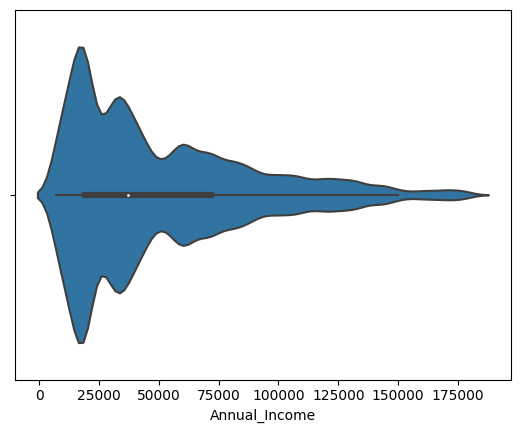

In [217]:
# Nao parece haver dados errados
# os valores de Annual_Income devem ser inferiores ao esperado
# por conta de impostos e taxas.

# vamos ver a distribuição de Monthly_Inhand_Salary
_= sns.violinplot(data= data_df, x= 'Annual_Income')

Os dados apresentam 2 modas e uma longa cauda a direita, como é esperado em dados de renda.

### Num_Bank_Accounts limits

In [222]:
# Eliminar valores negativos
data_df.loc[data_df['Num_Bank_Accounts'] < 0, 'Num_Bank_Accounts'] = np.nan

# Exibir os possiveis outliers da direita
Q1, Q3 = statistics.loc['Num_Bank_Accounts', ['25%', '75%']]
w_max = Q3 + 1.5 * (Q3 - Q1)
data_df[data_df['Num_Bank_Accounts'] > w_max]['Customer_ID', 'Month', 'Num_Bank_Accounts']

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
267,16388,4,44.0,Writer,58317.00,NaN,1414.0,5,9,6.0,...,Standard,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
288,16512,1,NaN,Mechanic,29469.98,2227.831667,1231.0,7,24,5.0,...,Standard,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
310,17068,7,37.0,Musician,15566.02,1423.168333,67.0,5,32,4.0,...,Poor,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
339,39873,4,42.0,Architect,20574.47,NaN,572.0,3,14,4.0,...,Standard,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
356,44763,5,19.0,Musician,85554.03,7185.502500,1488.0,2,3,0.0,...,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99591,1348,8,29.0,Mechanic,17013.29,1326.774167,813.0,1,10,1.0,...,Good,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99638,10607,7,25.0,Developer,125271.96,10374.330000,1481.0,7,1,4.0,...,Poor,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
99666,2825,3,31.0,Lawyer,146310.68,12124.556667,474.0,4,9,1.0,...,Standard,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99722,4551,3,53.0,Architect,36817.94,3198.161667,697.0,4,5,3.0,...,Standard,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [227]:
# como os customers nao se repentem, parece haver dados incongruentes
exib_customers(16388, 4551, cols= ['Customer_ID', 'Month', 'Num_Bank_Accounts'])

,Customer_ID,Month,Num_Bank_Accounts
264,16388,1,8.0
265,16388,2,8.0
266,16388,3,8.0
267,16388,4,1414.0
268,16388,5,8.0
269,16388,6,8.0
270,16388,7,8.0
271,16388,8,8.0
99720,4551,1,5.0
99721,4551,2,5.0


In [229]:
# Vamos limpar alteracoes maiores de 30:
data_df['Num_Bank_Accounts'] = data_df.groupby(
    data_df['Customer_ID'], group_keys=False
    )[['Num_Bank_Accounts', 'Month']].apply(
        change_over30_inc
        )

data_df['Num_Bank_Accounts'] = data_df.groupby(
    data_df['Customer_ID'], group_keys=False
    )[['Num_Bank_Accounts', 'Month']].apply(
        change_over30_dec
        )

# e reavaliar
data_df[data_df['Num_Bank_Accounts'] > w_max]['Customer_ID', 'Month', 'Num_Bank_Accounts']

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
1748,41475,5,40.0,Entrepreneur,46113.810,3953.817500,37.0,5,24,2.0,...,Poor,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6158,14383,7,16.0,Entrepreneur,9889.575,977.131250,38.0,10,17,2.0,...,Poor,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
12447,6332,8,41.0,Engineer,72617.550,5996.462500,26.0,4,5,NaN,...,Standard,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18124,19209,5,15.0,Scientist,80657.840,6534.486667,28.0,7,13,3.0,...,Standard,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
21388,43618,5,45.0,Teacher,19379.710,1796.975833,31.0,5,19,4.0,...,Standard,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
35688,21965,1,47.0,Journalist,19705.740,1377.145000,32.0,4,10,2.0,...,Standard,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
48188,23469,5,50.0,Lawyer,36535.570,3114.630833,34.0,3,9,3.0,...,Standard,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55871,19166,8,47.0,Architect,61976.440,5027.703333,28.0,5,8,4.0,...,Good,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
57421,24196,6,29.0,Architect,10339.530,747.627500,30.0,7,28,8.0,...,Poor,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
58356,41422,5,46.0,Scientist,17092.690,NaN,29.0,3,19,7.0,...,Poor,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [230]:
exib_customers(41475, 14383, 10485, cols= ['Customer_ID', 'Month', 'Num_Bank_Accounts'])

,Customer_ID,Month,Num_Bank_Accounts
1744,41475,1,7.0
1745,41475,2,7.0
1746,41475,3,7.0
1747,41475,4,7.0
1748,41475,5,37.0
1749,41475,6,7.0
1750,41475,7,7.0
1751,41475,8,7.0
6152,14383,1,10.0
6153,14383,2,10.0


In [234]:
# parece haver algumas diferenças pequenas, vamos olhar maiores que 2
data_df[data_df.groupby('Customer_ID')['Num_Bank_Accounts'].transform(
        lambda num: num.max() - num.min() > 2
)][['Customer_ID', 'Month', 'Num_Bank_Accounts']]\
    .pivot(
        index= 'Month',
        columns= 'Customer_ID',
        values= 'Num_Bank_Accounts'
    )

Customer_ID,6332,10485,14383,14789,17483,19166,19209,20332,21965,23469,24196,29520,35984,41422,41475,43618,44010
Month,,,,,,,,,,,,,,,,,
1,3.0,5.0,10.0,6.0,7.0,1.0,7.0,34.0,32.0,5.0,10.0,5.0,6.0,7.0,7.0,8.0,6.0
2,3.0,5.0,10.0,6.0,7.0,1.0,7.0,6.0,5.0,5.0,10.0,5.0,6.0,7.0,7.0,8.0,6.0
3,3.0,5.0,10.0,6.0,7.0,1.0,7.0,6.0,5.0,5.0,10.0,5.0,6.0,7.0,7.0,8.0,6.0
4,3.0,5.0,10.0,18.0,7.0,1.0,7.0,6.0,5.0,5.0,10.0,28.0,6.0,7.0,7.0,8.0,6.0
5,3.0,5.0,10.0,6.0,7.0,1.0,28.0,6.0,5.0,34.0,10.0,5.0,33.0,29.0,37.0,31.0,6.0
6,3.0,27.0,10.0,6.0,34.0,1.0,7.0,6.0,5.0,5.0,30.0,5.0,6.0,7.0,7.0,8.0,6.0
7,3.0,5.0,38.0,6.0,7.0,1.0,7.0,6.0,5.0,5.0,10.0,5.0,6.0,7.0,7.0,8.0,33.0
8,26.0,5.0,10.0,6.0,7.0,28.0,7.0,6.0,5.0,5.0,10.0,5.0,6.0,7.0,7.0,8.0,6.0


In [240]:
# Realmente essas diferenças parecem ser devido a falhas
# Vamos traçar um limiar no 10 e trocar os valores por nulos
data_df.loc[
    data_df.groupby('Customer_ID')['Num_Bank_Accounts']\
    .transform(
        lambda num: (num.max() - num.min() > 2) & (num > 10)
    ),
    'Num_Bank_Accounts'
] = np.nan

# conferir dados
np.any(
    data_df.groupby('Customer_ID')['Num_Bank_Accounts'].transform(
        lambda num: num.max() - num.min() > 2
))

False

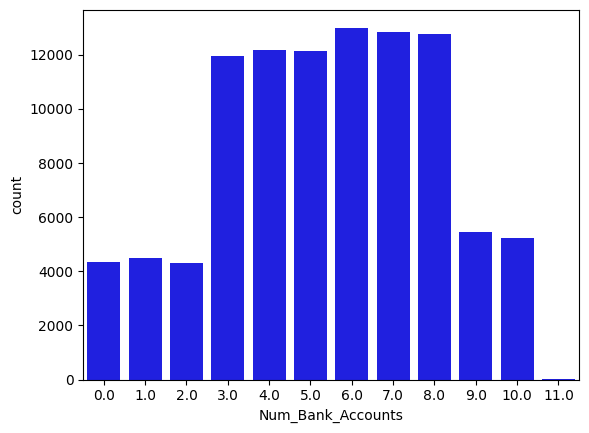

In [244]:
# Nao faremos preenchimento por mes, pois é factivel criar um conta
# e escluir outra no intervalo de 1 mes, o que promoveria uma pequena variação
# nos dados. Logo não há lógica forte para adotar o mesmo número que visto
# para outros meses

# Vamos olhar a distribuição
_= sns.countplot(data= data_df, x= 'Num_Bank_Accounts', color= 'b')

In [247]:
# verificar os dados com 11 contas
data_df[data_df['Num_Bank_Accounts'] == 11][['Customer_ID', 'Month', 'Num_Bank_Accounts']]

,Customer_ID,Month,Num_Bank_Accounts
76444,27857,5,11.0
76445,27857,6,11.0
76446,27857,7,11.0
76447,27857,8,11.0
85959,33221,8,11.0
96820,2649,5,11.0
96821,2649,6,11.0
96822,2649,7,11.0
96823,2649,8,11.0


In [248]:
# verificar se o customer 33221 apresenta uma sequencia consistente de valores
exib_customers(33221, cols= ['Customer_ID', 'Month', 'Num_Bank_Accounts'])

,Customer_ID,Month,Num_Bank_Accounts
85952,33221,1,10.0
85953,33221,2,10.0
85954,33221,3,10.0
85955,33221,4,10.0
85956,33221,5,10.0
85957,33221,6,10.0
85958,33221,7,10.0
85959,33221,8,11.0


In [250]:
# verificar os casos de 0 contas
data_df[data_df['Num_Bank_Accounts'] == 0]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
48,10314,1,33.0,Lawyer,131313.40,11242.783333,0.0,1,8,2.0,...,Good,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
49,10314,2,34.0,Lawyer,131313.40,11242.783333,0.0,1,8,2.0,...,Good,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50,10314,3,34.0,Lawyer,131313.40,10469.207759,0.0,1,8,2.0,...,Good,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
51,10314,4,34.0,Lawyer,131313.40,10469.207759,0.0,1,8,2.0,...,Good,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
52,10314,5,34.0,Lawyer,131313.40,10469.207759,0.0,1,8,2.0,...,Good,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99963,14124,4,18.0,Lawyer,42903.79,NaN,0.0,4,6,1.0,...,Standard,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99964,14124,5,18.0,Lawyer,42903.79,3468.315833,0.0,4,6,1.0,...,Good,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99965,14124,6,19.0,Lawyer,42903.79,3468.315833,0.0,4,6,1.0,...,Good,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99966,14124,7,19.0,Lawyer,42903.79,3468.315833,0.0,4,6,1.0,...,Good,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Os dados se mostram bem distribuídos, mais concentrados de 3 a 8 contas. Há muitos customers com 0 contas, porém não vimos nenhum indício de erro de preenchimento nesses casos

### Interest_Rate - Outliers a direita ?

<Axes: xlabel='Interest_Rate', ylabel='Count'>

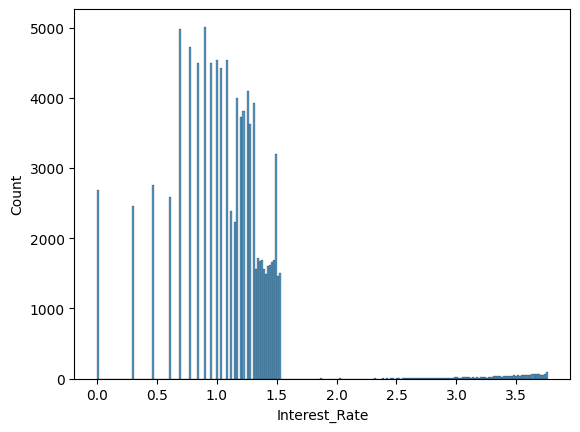

In [253]:
# Interest rates on credit cards usually range from 2.5% to 3.5% per month.
# But there are values far from 100%
sns.histplot(np.log10(data_df['Interest_Rate']))

In [261]:
# vamos olhar o ultimo quadrante
Q3 = statistics.loc['Interest_Rate', '75%']
print('Q3:', Q3)
data_df[data_df['Interest_Rate'] > Q3][['Customer_ID', 'Month', 'Interest_Rate']]

Q3: 20.0


,Customer_ID,Month,Interest_Rate
44,38382,5,5318
89,49323,2,433
104,27750,1,32
105,27750,2,32
106,27750,3,32
...,...,...,...
99988,34304,5,29
99989,34304,6,29
99990,34304,7,29
99991,34304,8,29


In [258]:
# Parecem haver customers com taxas altas mesmo,
# porém também alguns outliers.
# Vamos focar nos valores acima de 50%,
# que seriam interest_rates extremante elevados
data_df[data_df['Interest_Rate'] > 50][['Customer_ID', 'Month', 'Interest_Rate']]

,Customer_ID,Month,Interest_Rate
44,38382,5,5318
89,49323,2,433
167,4911,8,5240
178,44166,3,4975
229,49150,6,668
...,...,...,...
99791,25333,8,4396
99801,4658,2,387
99882,18426,3,1947
99914,5657,3,360


In [259]:
# Realmente sao meses isolados para customers
data_df[data_df['Interest_Rate'] > 50]['Customer_ID'].value_counts()

50897    3
17572    3
39266    3
25269    3
11211    3
        ..
7893     1
26920    1
21472    1
15369    1
37932    1
Name: Customer_ID, Length: 1911, dtype: int64

In [260]:
exib_customers(50897, 39266, 26920, cols= ['Customer_ID', 'Month', 'Interest_Rate'])

,Customer_ID,Month,Interest_Rate
40272,50897,1,18
40273,50897,2,18
40274,50897,3,146
40275,50897,4,5546
40276,50897,5,18
40277,50897,6,18
40278,50897,7,18
40279,50897,8,107
88368,39266,1,5580
88369,39266,2,5


In [266]:
# Este aparenta ser o caso de valores erroneamente inseridos,
# entao vamos anulá-los
data_df.loc[data_df['Interest_Rate'] > 50, 'Interest_Rate'] = np.nan

# E olhar quantos customers possuem diferentes taxas para diferentes meses
data_df.groupby('Customer_ID')['Interest_Rate'].agg(
        lambda rate: rate.max() > rate.min()
).sum()

0

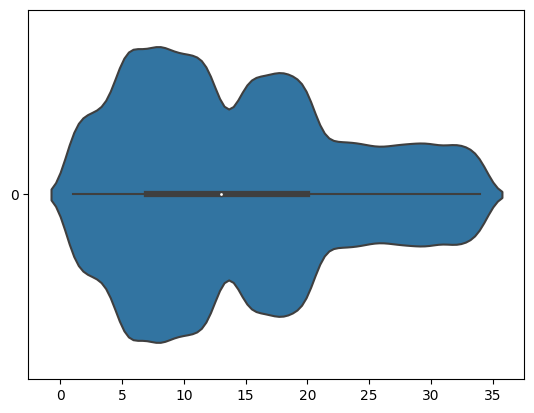

In [271]:
# Nao precisamos olhar mais inconguências, entao vamos
# analisar a distirbuição dos dados agora limpos
_= sns.violinplot(data_df['Interest_Rate'], orient= 'h')

Novamente uma distribuição bimodal com
calda a direita.

In [276]:
# uma rapida verificacao para as taxas da extrema ponta
data_df[data_df['Interest_Rate'] == data_df['Interest_Rate'].max()][['Customer_ID', 'Month', 'Interest_Rate']]

,Customer_ID,Month,Interest_Rate
936,24087,1,34.0
937,24087,2,34.0
938,24087,3,34.0
939,24087,4,34.0
940,24087,5,34.0
...,...,...,...
99131,47955,4,34.0
99132,47955,5,34.0
99133,47955,6,34.0
99134,47955,7,34.0


### Next

In [278]:
data_df.to_csv('/content/data_cliend_2023_07_04_18_11.csv')
statistics.to_csv('/content/statistics.csv')

In [ ]:
data_df = pd.read('/content/data_cliend_2023_07_04_18_11.csv')
data_df = pd.read('/content/statistics.csv')

## Tratar Dados Nulos

Verificar contagem de dados nulos (faltantes/NaN)

In [ ]:
na_data = data_df.isna().sum()
na_data[na_data > 0]

In [ ]:
print(f'porcentagem de dados nulos: { na_data.sum() / len(data_df) :.1%}')
print(f'porcentagem de registros com algum dado nulo: { np.any(data_df.isna(), axis= 1).sum() / len(data_df) :.1%}')

Como a porcentagem de registros é muita alta, vamos tentar preencher dados nulos.

Seguiremos a ordem das colunas pela contagem de nulos.


#### Monthly_Inhand_Salary

In [ ]:
# Monthly_Inhand_Salary might be filled with data from same customer
len( data_df.dropna(subset= 'Monthly_Inhand_Salary')['Customer_ID'].unique() )

In [ ]:
# Since all 12500 have at least a single not null value, we can use this value to
# estimate the missing data

# Primeiro, tentamos preencher os dados com o valor encontrado no mes anterior, mas
# isso pode falhar caso o primeiro mes esteja nulo
fill_salary_forward = data_df.sort_values('Month').groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(
    lambda salary_group: salary_group.fillna(method= 'ffill')
).sort_index()
filled_salary = data_df['Monthly_Inhand_Salary'].fillna(fill_salary_forward)

filled_salary[filled_salary.isna()]

In [ ]:
# analyze these data, to see if they were unemployed or some other reason for missing data
data_df[fill_salary_forward.isna()]

In [ ]:
# since Annual_Income is a valid value, let's procced using backward propagation
fill_salary_backward = data_df.sort_values('Month').groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(
    lambda salary_group: salary_group.fillna(method= 'bfill')
).sort_index()
filled_salary = filled_salary.fillna(fill_salary_backward)

filled_salary[filled_salary.isna()]

In [ ]:
data_df['Monthly_Inhand_Salary'] = filled_salary
data_df['Monthly_Inhand_Salary'].isna().sum()

#### Changed_Credit_Limit

In [ ]:
# Verifica quantos customers tem pelo menos um valor de 'Changed_Credit_Limit'
len( data_df.dropna(subset= 'Changed_Credit_Limit')['Customer_ID'].unique() )

In [ ]:
# Como todos possuem, podemos analisar os valores para entender como melhor preenche-los
data_df.query('Changed_Credit_Limit.isnull()').groupby('Customer_ID')['Changed_Credit_Limit'].size().sort_values(ascending= False)

In [ ]:
# caso exemplo 1
data_df[data_df['Customer_ID'] == 28666].Changed_Credit_Limit

In [ ]:
# caso exemplo 2
data_df[data_df['Customer_ID'] == 46029].Changed_Credit_Limit

In [ ]:
# caso exemplo 3
data_df[data_df['Customer_ID'] == 18325].Changed_Credit_Limit

In [ ]:
# vamos substituir nulos pela moda
data_df['Changed_Credit_Limit'] = data_df['Changed_Credit_Limit'].fillna(
    data_df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(
        lambda limits: limits.value_counts().index[0]
    )
)
data_df['Changed_Credit_Limit'].isna().sum()

In [ ]:
# caso exemplo 2
data_df[data_df['Customer_ID'] == 46029].Changed_Credit_Limit

In [ ]:
# caso exemplo 3
data_df[data_df['Customer_ID'] == 18325].Changed_Credit_Limit

#### Amount_invested_monthly

In [ ]:
# Verifica quantos customers tem pelo menos um valor de 'Changed_Credit_Limit'
len( data_df.dropna(subset= 'Amount_invested_monthly')['Customer_ID'].unique() )

In [ ]:
# Como todos possuem, podemos analisar os valores para entender como melhor preenche-los
data_df.query('Amount_invested_monthly.isnull()').groupby('Customer_ID')['Amount_invested_monthly'].size().sort_values(ascending= False)

In [ ]:
# caso exemplo 1
data_df[data_df['Customer_ID'] == 40980].Amount_invested_monthly

In [ ]:
# caso exemplo 2
data_df[data_df['Customer_ID'] == 41073].Amount_invested_monthly

In [ ]:
# caso exemplo 3
data_df[data_df['Customer_ID'] == 50999].Amount_invested_monthly

In [ ]:
# Como os valores tem alguns extremos, usaremos a mediana por ser mais robusta que
# a média quanto a outliers
data_df['Amount_invested_monthly'] = data_df['Amount_invested_monthly'].fillna(
    data_df.sort_values('Month')\
    .groupby('Customer_ID')\
    ['Amount_invested_monthly']\
    .transform('median')
)

In [ ]:
# caso exemplo 1
data_df[data_df['Customer_ID'] == 40980].Amount_invested_monthly

In [ ]:
# caso exemplo 2
data_df[data_df['Customer_ID'] == 41073].Amount_invested_monthly

In [ ]:
# caso exemplo 3
data_df[data_df['Customer_ID'] == 50999].Amount_invested_monthly

#### Monthly_Balance

In [ ]:
# Verifica quantos customers tem pelo menos um valor de 'Changed_Credit_Limit'
len( data_df.dropna(subset= 'Monthly_Balance')['Customer_ID'].unique() )

In [ ]:
# Nem todos possuem, mas podemos analisar os valores para entender como melhor preenche-los
# Primeiro os que possuem algum dado
missing_monthly_balance = data_df.query('Monthly_Balance.isnull()').groupby('Customer_ID')['Monthly_Balance'].size().sort_values(ascending= False)
missing_monthly_balance[missing_monthly_balance < 8]

In [ ]:
# caso exemplo 1
data_df[data_df['Customer_ID'] == 4744].Monthly_Balance

In [ ]:
# caso exemplo 2
data_df[data_df['Customer_ID'] == 23199].Monthly_Balance

In [ ]:
# Como os valores também tem alguns extremos, usaremos a mediana por ser mais robusta que
# a média quanto a outliers
data_df['Monthly_Balance'] = data_df['Monthly_Balance'].fillna(
    data_df.sort_values('Month')\
    .groupby('Customer_ID')\
    ['Monthly_Balance']\
    .transform('median')
)

In [ ]:
# Agora os sem dados
data_df.merge(missing_monthly_balance[missing_monthly_balance == 8], on= 'Customer_ID')

Nao observamos nada util, mas podemos seguir com algumas abordagens:
- inputar a mediana/média do valor da coluna
- inputar a mediana/média com base em grupos, por exemplo pela Occupation
- remover essas linhas
- remover a coluna

Como essas linhas representam menos de 2% dos dados, vamos optar por eliminá-las.

#### Using Customer_ID to fill "customer-constante" columuns


In [ ]:
# Type_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries can be set the same way
cust_cte_cols = ['Type_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']
for col in cust_cte_cols:
    print(col, len( data_df.dropna(subset= col)['Customer_ID'].unique() ))

Type_of_Loan não vai ser completamente preenchida, mas as outras duas sim


In [ ]:
cust_cte_fill_forward = data_df.sort_values('Month').groupby('Customer_ID')[cust_cte_cols].transform(
    lambda salary_group: salary_group.fillna(method= 'ffill')
).sort_index()
filled_cust_cte_cols = data_df[cust_cte_cols].fillna(cust_cte_fill_forward)
filled_cust_cte_cols.isna().sum()

In [ ]:
cust_cte_fill_backward = data_df.sort_values('Month').groupby('Customer_ID')[cust_cte_cols].transform(
    lambda salary_group: salary_group.fillna(method= 'bfill')
).sort_index()
filled_cust_cte_cols = filled_cust_cte_cols.fillna(cust_cte_fill_backward)
filled_cust_cte_cols.isna().sum()

In [ ]:
data_df[cust_cte_cols] = filled_cust_cte_cols

#### Type_of_Loan

In [ ]:
# Verificar se houve um número positivos de emprestimo para os dados vazios em Type_of_Loan
data_df.query('Type_of_Loan.isnull()')['Num_of_Loan'].unique()

In [ ]:
# Como existe um tipo de empréstimo "Not Specified", vamos usar esse tipo nos
# casos em que houve algum empréstimo, mas estão com tipo nulo
not_specified_loans = data_df.query('Num_of_Loan > 0')['Type_of_Loan'].fillna("Not Specified")
data_df['Type_of_Loan'] = data_df['Type_of_Loan'].fillna(not_specified_loans)

data_df.query('Type_of_Loan.isnull()')['Num_of_Loan'].unique()

# Modelos